In this project, we'll work with a data set of submissions to popular technology site Hacker News.

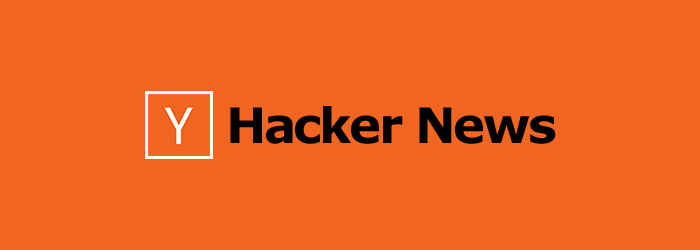



Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

You can find the data set here, but note that it has been reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions. Below are descriptions of the column:

    * id: The unique identifier from Hacker News for the post
    * title: 
    * url: The URL that the posts links to, if it the post has a URL
    * num_points: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
    * num_comments: The number of comments that were made on the post
    * author: The username of the person who submitted the post
    * created_at: The date and time at which the post was submitted

We're specifically interested in posts whose titles begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question. Below are a couple examples:

    Ask HN: How to improve my personal website? 
    Ask HN: Am I the only one outraged by Twitter shutting down share counts? 
    Ask HN: Aby recent changes to CSS that broke mobile?


Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting. Below are a couple of examples:

    Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'
    Show HN: Something pointless I made
    Show HN: Shanhu.io, a programming playground powered by e8vm
    
We'll compare these two types of posts to determine the following:

#### about comments

    Do Ask HN or Show HN receive more comments on average?
    Do posts created at a certain time receive more comments on average?


#### about points

    Do Ask HN or Show HN receive more points on average?___

    Do posts created at a certain time receive more points on average?


#### about posts

    Do Ask HN or Show HN receive more posts on average?___

    Do posts created at a certain time receive more posts on average?




In [1]:
# para efetuar a leitura de um arquivo .csv
from csv import reader

In [2]:
# para trabalhar com formatos de data e hora
import datetime as dt

In [3]:
# para classificar dicionario
import operator

In [4]:
# to print as a table
from prettytable import PrettyTable

In [5]:
opened_file = open(r'C:\Users\Sandra\Documents\Dataquest\hacker_news.csv')

read_file = reader(opened_file)

hn = list(read_file)
opened_file.close()

In [6]:
# mostrar as cinco primeiras linhas de uma lista

def print_five_row(aux_list):
    print (len(aux_list))
    for i in range(0,5):
        print (aux_list[i], '\n')

In [7]:
print_five_row(hn)

20101
['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'] 

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'] 

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'] 

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'] 

['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'] 



In [8]:
headers = hn[0]
print (headers)
hn = hn[1:]
print_five_row(hn)

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
20100
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'] 

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'] 

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'] 

['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'] 

['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12'] 



Now that we've removed the headers from hn, we're ready to filter our data. Since we're only concerned with post titles beginning with Ask HN or Show HN, we'll create new lists of lists containing just the data for those titles.

    ask_posts: only for Aks HN
    show_posts : only for Show HN
    other_posts: for others
    
Na mesma seleção, já vamos contar a qtde de comentários e a pontuação para "ask" e "show"

In [9]:
ask_posts = []
show_posts = []
other_posts = []

total_ask_coments = 0
total_show_coments = 0

total_ask_points = 0
total_show_points = 0

for row in hn:
    title = row[1].lower()
    total_coments = 0
    total_points = 0
    
    if row[3].isnumeric():
        total_points = int(row[3])
        
    if row[4].isnumeric():
        total_coments = int(row[4])
        
    if title.startswith('ask hn'):
        ask_posts.append(row)
        total_ask_coments += total_coments 
        total_ask_points += total_points
        
    elif title.startswith('show hn'):
        show_posts.append(row)
        total_show_coments += total_coments
        total_show_points += total_points
        
    else: 
        other_posts.append(row)     
           
print (len(ask_posts), len(show_posts), len(other_posts))




1744 1162 17194


In [10]:
print_five_row(ask_posts)

1744
['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55'] 

['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43'] 

['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14'] 

['12210105', 'Ask HN: Looking for Employee #3 How do I do it?', '', '1', '3', 'sph130', '8/2/2016 14:20'] 

['10394168', 'Ask HN: Someone offered to buy my browser extension from me. What now?', '', '28', '17', 'roykolak', '10/15/2015 16:38'] 



In [11]:
print_five_row(show_posts)

1162
['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03'] 

['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46'] 

['11590768', 'Show HN: Shanhu.io, a programming playground powered by e8vm', 'https://shanhu.io', '1', '1', 'h8liu', '4/28/2016 18:05'] 

['12178806', 'Show HN: Webscope  Easy way for web developers to communicate with Clients', 'http://webscopeapp.com', '3', '3', 'fastbrick', '7/28/2016 7:11'] 

['10872799', 'Show HN: GeoScreenshot  Easily test Geo-IP based web pages', 'https://www.geoscreenshot.com/', '1', '9', 'kpsychwave', '1/9/2016 20:45'] 



In [33]:
# Vamos calcular a media dos comentarios para "ask" e para "show"

avg_ask_comments = total_ask_coments / (total_ask_coments + total_show_coments)
avg_show_comments = total_show_coments /(total_ask_coments + total_show_coments)

avg_ask_points = total_ask_points / (total_ask_points + total_show_points)
avg_show_points = total_show_points / (total_ask_points + total_show_points)

print ('Avg Ask Coments= {:.2f}'.format(avg_ask_comments))
print ('Avg Show Coments= {:.2f}'.format(avg_show_comments))
print ('\n')
print ('Avg Ask Points= {:.2f}'.format(avg_ask_points))
print ('Avg Show Points= {:.2f}'.format(avg_show_points))


Avg Ask Coments= 0.67
Avg Show Coments= 0.33


Avg Ask Points= 0.45
Avg Show Points= 0.55


Agora podemos responder: ___Do Ask HN or Show HN receive more comments on average?___

Pela media, podemos considerar que as pessoas costumam participar mais em assuntos do tipo 
"Ask HN" do que em "Show HN".
Talvez porque "Show HN" seja mais uma contribuição do autor e não precise necessariamente de um comentário.


Também podemos responder: ___Do Ask HN or Show HN receive more points on average?___
Pelo contrário, posts do tipo Show HN tendem a receber mais points do que Ask HN. 
O que faz sentido já que Show HN tendem a ter menos comentários.

Since ask posts are more likely to receive comments, we'll focus our remaining analysis just on these posts for comments.

Next, we'll determine if ask posts created at a certain time are more likely to attract comments

In [13]:
# convertendo data/hora
print (ask_posts[6][6])
date_1_str = ask_posts[6][6]
date_1_dt = dt.datetime.strptime(date_1_str, "%m/%d/%Y %H:%M")
print (date_1_dt)

time = date_1_dt.time()
print (time)
print (type(time), ' ', time)

time_now = time.strftime("%H")
print (time_now, ' ', type(time_now))


4/22/2016 12:24
2016-04-22 12:24:00
12:24:00
<class 'datetime.time'>   12:24:00
12   <class 'str'>


In [14]:
# desconvertendo data/hora
time_ret = dt.datetime.strptime(time_now, "%H")
print (time_ret)
time = time_ret.strftime("%H:%M")
print (time, type(time))


1900-01-01 12:00:00
12:00 <class 'str'>


In [15]:
# rotina comum para elaborar o dicionario e a lista de horas e calcular a média

def count_by_hour(aux_posts):
    count_by_hour = {}
    comment_by_hour = {}

    avg_coments = 0
    avg_points = 0
    
# Elaborando uma list para os resultados no dicionário
# count_by_hour list
#   0 = total posts 
#   1 = total_comments
#   2 = avg_comments = total_comments / total_posts

#   3 = total_points
#   4 = avg_points = total_points / total_posts

    for row in aux_posts:
        total_points = int(row[3])
        total_coment = int(row[4])
        date_comment = dt.datetime.strptime(row[6], "%m/%d/%Y %H:%M")
        time_comment = date_comment.time()
        time_now = time_comment.strftime("%H")
    
        if time_now in count_by_hour:
            count_by_hour[time_now][0] += 1
            count_by_hour[time_now][1] += total_coment
            count_by_hour[time_now][3] += total_points
        else:
            count_by_hour[time_now] = [1, total_coment, avg_coments, total_points, \
                                       avg_points]
            
# classificando o dicionário pelo horário
    
    dict_s = {}
    for i in sorted (count_by_hour.keys()):
        dict_s[i] = count_by_hour[i]
        
# perform average
    for hour in dict_s:
        dict_s[hour][2] = dict_s[hour][1] / dict_s[hour][0]
        dict_s[hour][4] = dict_s[hour][3] / dict_s[hour][0]
        
# para facilitar a classificação desses resultados, vamos transformar todo
# dicionário em uma lista
    list_hour = []
    for hour in dict_s:
        list_hour.append([hour, dict_s[hour][0], dict_s[hour][1], dict_s[hour][2], \
                         dict_s[hour][3], dict_s[hour][4]]) 
        
# count_by_hour list
#   0 = hour
#   1 = total posts 
#   2 = total_comments
#   3 = avg_comments = total_comments / total_posts
#   4 = total_points
#   5 = avg_points = total_points / total_posts
        
    return list_hour


In [16]:
# for commnets using ask_posts

comment_by_hour = count_by_hour(ask_posts)

In [17]:
# aks hn cuja hora tem o maior número de postagem

max(comment_by_hour, key=lambda x: x[1])

['15', 116, 4477, 38.5948275862069, 3479, 29.99137931034483]

Existem 116 postagens as 15:00 hrs. Este foi o horário com maior número de postagens. Nesse horário existem 4.477 comentarios no total, que é o maior número de comentários feitos. 

In [18]:
# aks hn cuja hora tem o menor número de postagem

min(comment_by_hour, key=lambda x: x[1])

['07', 34, 267, 7.852941176470588, 361, 10.617647058823529]

Existem somente 34 postagens as 07:00 hrs. Este foi o horário com o menor número de postagens. Nesse horário existem 267 comentarios no total, mas não corresponde ao menor número de comentários pois as 09:00 hrs '09' apesar de existirem 45 posts mas somente 251 comments. 

Para sabermos quais os horários que tiveram mais ou menos comments, vamos visualizar a média, 
que é o total de comentários / total de postagens

In [19]:
# exibir a media
def print_table_results(list_result, titulo, qtd_ocor = 5):
    
    t = PrettyTable(['Hour', 'Total post', 'Total Coments', 'Avg comments', 'Total Points', "Avg points"])
    
    for i in range(qtd_ocor):
        row = list_result[i]
        t.add_row([row[0], row[1], row[2], round(row[3],2), row[4], round(row[5],2)])
    
    print (titulo)
    print (t)

In [20]:
print_table_results(comment_by_hour, "About HN", qtd_ocor=len(comment_by_hour))

About HN
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+------------+---------------+--------------+--------------+------------+
|  00  |     55     |      447      |     8.13     |     451      |    8.2     |
|  01  |     60     |      683      |    11.38     |     700      |   11.67    |
|  02  |     58     |      1381     |    23.81     |     793      |   13.67    |
|  03  |     54     |      421      |     7.8      |     374      |    6.93    |
|  04  |     47     |      337      |     7.17     |     389      |    8.28    |
|  05  |     46     |      464      |    10.09     |     552      |    12.0    |
|  06  |     44     |      397      |     9.02     |     591      |   13.43    |
|  07  |     34     |      267      |     7.85     |     361      |   10.62    |
|  08  |     48     |      492      |    10.25     |     515      |   10.73    |
|  09  |     45    

In [21]:
# vamos classificar pela média mis alta de comentários 
list_avg_high = sorted(comment_by_hour, key = lambda x: x[3], reverse=True) 

list_post_high = sorted(comment_by_hour, key = lambda x: x[1], reverse=True) 

titulo = "HN: Hora com maiores números médios de comentários"
print_table_results(list_avg_high, titulo, qtd_ocor=5)
print ('\n')
titulo = "HN: Hora com maiores número de posts"
print_table_results(list_post_high, titulo, qtd_ocor=5)


HN: Hora com maiores números médios de comentários
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+------------+---------------+--------------+--------------+------------+
|  15  |    116     |      4477     |    38.59     |     3479     |   29.99    |
|  02  |     58     |      1381     |    23.81     |     793      |   13.67    |
|  20  |     80     |      1722     |    21.52     |     1151     |   14.39    |
|  16  |    108     |      1814     |     16.8     |     2522     |   23.35    |
|  21  |    109     |      1745     |    16.01     |     1721     |   15.79    |
+------+------------+---------------+--------------+--------------+------------+


HN: Hora com maiores número de posts
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+-----------

Podemos concluir que nem sempre o maior número de posts terá a maior média dos comentários. 
Porém podemos notar que parece ter uma relação entre o horário que existe mais posts e as maiores médias de comentários. 

Podemos observar que posts feitos entre as 15 e 16 hrs (respectivamente com 38,59% e 16,8% de comentários em média) e entre as 20 e 21 (respectivamente 21,52% e 16,01%) e as 02:00 hrs em que existem poucos posts porém com uma média alta de comentários (respectivamente 23,81 %) seriam os horários mais prováveis para se obter comentários.

In [22]:
# vamos classificar pela média mais baixa de comentários 
list_avg_low = sorted(comment_by_hour, key = lambda x: x[3]) 

list_post_low = sorted(comment_by_hour, key = lambda x: x[1]) 

titulo = "Hora com menores medias de comentários"
print_table_results(list_avg_low, titulo, qtd_ocor=5)
print ('\n')

titulo = "Hora com menores números de posts"
print_table_results(list_post_low, titulo)


Hora com menores medias de comentários
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+------------+---------------+--------------+--------------+------------+
|  09  |     45     |      251      |     5.58     |     329      |    7.31    |
|  22  |     71     |      479      |     6.75     |     511      |    7.2     |
|  04  |     47     |      337      |     7.17     |     389      |    8.28    |
|  03  |     54     |      421      |     7.8      |     374      |    6.93    |
|  07  |     34     |      267      |     7.85     |     361      |   10.62    |
+------+------------+---------------+--------------+--------------+------------+


Hora com menores números de posts
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+------------+-------------

É interessante notar que parece não existir uma relação tão clara entre o horário em que existem poucos posts com as menores médias de comentários.

Portanto deveríamos evitar postar entre as 07:00 e 09:00, as 22:00 e entre as 03:00 e as 04:00 hrs em que temos as menores médias de comentários. Porém as 02:00 pode ser um bom horário.

Now, it's possible answer the question
    ___Do posts created at a certain time receive more comments on average?___

15:00: 38.59 average comments per post.

In [23]:
print ("Do posts created at a certain time receive more comments on average?")
for i in range(5):
    row = list_avg_high[i]
    time_now = row[0]
    time_ret = dt.datetime.strptime(time_now, "%H")
    time = time_ret.strftime("%H:%M")
    print ('At {hour} has {avg:.2f}% average comments per post'.format(hour=time, avg=row[3]))


Do posts created at a certain time receive more comments on average?
At 15:00 has 38.59% average comments per post
At 02:00 has 23.81% average comments per post
At 20:00 has 21.52% average comments per post
At 16:00 has 16.80% average comments per post
At 21:00 has 16.01% average comments per post


Now, what about posts created at a certain time receive fewest comments on average?

In [24]:
print ("Do posts created at a certain time receive few comments on average?")
for i in range(5):
    row = list_avg_low[i]
    time_now = row[0]
    time_ret = dt.datetime.strptime(time_now, "%H")
    time = time_ret.strftime("%H:%M")
    print ('At {hour} has {avg:.2f}% average comments per post'.format(hour=time, avg=row[3]))


Do posts created at a certain time receive few comments on average?
At 09:00 has 5.58% average comments per post
At 22:00 has 6.75% average comments per post
At 04:00 has 7.17% average comments per post
At 03:00 has 7.80% average comments per post
At 07:00 has 7.85% average comments per post


Vamos verificar para total points, qual o melhor e o pior horário com base na média de pontuação. Para este caso, vamos considerar os dados para "Show HN" pois tem maior média de pontuação.

In [25]:
# for points using show_posts
points_by_hour = count_by_hour(show_posts)


In [26]:
# exibir os resultados em uma tabela
print_table_results(points_by_hour, "About Show HN", qtd_ocor=len(points_by_hour))

About Show HN
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+------------+---------------+--------------+--------------+------------+
|  00  |     31     |      487      |    15.71     |     1173     |   37.84    |
|  01  |     28     |      246      |     8.79     |     700      |    25.0    |
|  02  |     30     |      127      |     4.23     |     340      |   11.33    |
|  03  |     27     |      287      |    10.63     |     679      |   25.15    |
|  04  |     26     |      247      |     9.5      |     386      |   14.85    |
|  05  |     19     |       58      |     3.05     |     104      |    5.47    |
|  06  |     16     |      142      |     8.88     |     375      |   23.44    |
|  07  |     26     |      299      |     11.5     |     494      |    19.0    |
|  08  |     34     |      165      |     4.85     |     519      |   15.26    |
|  09  |     3

In [27]:
# show hn cuja hora tem o maior número de postagem
max(points_by_hour, key=lambda x: x[1])

['13', 99, 946, 9.555555555555555, 2438, 24.626262626262626]

Existem 99 postagens as 13:00 hrs. Este foi o horário com maior número de postagens. 
Nesse horário existem 2.438 points no total, que não é a maior pontução alcançada.
Vamos confirmar esse resultado mais adiante

In [28]:
# show hn cuja hora tem o menor número de postagem
min(points_by_hour, key=lambda x: x[1]) 


['06', 16, 142, 8.875, 375, 23.4375]

Existem somente 16 postagens as 06:00 hrs. Este foi o horário com o menor número de postagens. 
Nesse horário existem 375 points no total, que pode não é a menor pontuação alcançada. Vamos verificar esse resultado mais adiante. 

Para sabermos quais os horários que tiveram as pontuações menores e maiores, vamos visualizar a média, 
que é o total da pontuação / total de postagens

In [29]:
# vamos classificar pela média mais alta de pontuação 
list_avg_high = sorted(points_by_hour, key = lambda x: x[5], reverse=True) 
list_post_high = sorted(points_by_hour, key = lambda x: x[1], reverse=True) 

titulo = "HN: Hora com as maiores pontuações na média"
print_table_results(list_avg_high, titulo, qtd_ocor=5)
print ('\n')

titulo = "HN: Hora com os maiores número de posts"
print_table_results(list_post_high, titulo, qtd_ocor=5)

HN: Hora com as maiores pontuações na média
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+------------+---------------+--------------+--------------+------------+
|  23  |     36     |      447      |    12.42     |     1526     |   42.39    |
|  12  |     61     |      720      |     11.8     |     2543     |   41.69    |
|  22  |     46     |      570      |    12.39     |     1856     |   40.35    |
|  00  |     31     |      487      |    15.71     |     1173     |   37.84    |
|  18  |     61     |      962      |    15.77     |     2215     |   36.31    |
+------+------------+---------------+--------------+--------------+------------+


HN: Hora com os maiores número de posts
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+------------+--

Podemos concluir que nem sempre o maior número de posts terá a maior pontuação média. 

Podemos observar que posts feitos entre as 22 e 23 hrs possuem pontuação média alta (respectivamente com 40.35% e 42.39% de pontuação média) e que postagens feitas entre as 13 e as 17:00(respectivamente 24,63% e 27.11%) seriam os horários com maiores postagens que não tem alta pontuação na média


In [30]:
# vamos classificar pela média mais baixa de comentários 
list_avg_low = sorted(points_by_hour, key = lambda x: x[5]) 

list_post_low = sorted(points_by_hour, key = lambda x: x[1]) 

titulo = "Hora com menores pontuações médias"
print_table_results(list_avg_low, titulo, qtd_ocor=5)
print ('\n')

titulo = "Hora com menores números de posts"
print_table_results(list_post_low, titulo)

Hora com menores pontuações médias
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+------------+---------------+--------------+--------------+------------+
|  05  |     19     |       58      |     3.05     |     104      |    5.47    |
|  02  |     30     |      127      |     4.23     |     340      |   11.33    |
|  04  |     26     |      247      |     9.5      |     386      |   14.85    |
|  08  |     34     |      165      |     4.85     |     519      |   15.26    |
|  21  |     47     |      272      |     5.79     |     866      |   18.43    |
+------+------------+---------------+--------------+--------------+------------+


Hora com menores números de posts
+------+------------+---------------+--------------+--------------+------------+
| Hour | Total post | Total Coments | Avg comments | Total Points | Avg points |
+------+------------+---------------+-

É interessante notar que parece existir uma relação clara entre o horário em que existem 
poucos posts com as menores pontuaçoes médias.

Portanto deveríamos evitar postar entre as 02:00 e 08:00 e as 21:00  
em que temos as menores pontuações médias (e também o menor número de posts)

Now, it's possible answer the question
    ___Do posts created at a certain time receive more points on average?___
    
    23  |     36     |      447      |    12.42     |     1526     |   42.39  

23:00: 42.39 average points per post.

In [31]:
print ("Do posts created at a certain time receive more points on average?")
for i in range(5):
    row = list_avg_high[i]
    time_now = row[0]
    time_ret = dt.datetime.strptime(time_now, "%H")
    time = time_ret.strftime("%H:%M")
    print ('At {hour} has {avg:.2f}% average points per post'.format(hour=time, avg=row[5]))

Do posts created at a certain time receive more points on average?
At 23:00 has 42.39% average points per post
At 12:00 has 41.69% average points per post
At 22:00 has 40.35% average points per post
At 00:00 has 37.84% average points per post
At 18:00 has 36.31% average points per post


Now, what about posts created at a certain time receive fewest comments on average?

In [32]:
print ("Do posts created at a certain time receive few comments on average?")
for i in range(5):
    row = list_avg_low[i]
    time_now = row[0]
    time_ret = dt.datetime.strptime(time_now, "%H")
    time = time_ret.strftime("%H:%M")
    print ('At {hour} has {avg:.2f}% average points per post'.format(hour=time, avg=row[5]))

Do posts created at a certain time receive few comments on average?
At 05:00 has 5.47% average points per post
At 02:00 has 11.33% average points per post
At 04:00 has 14.85% average points per post
At 08:00 has 15.26% average points per post
At 21:00 has 18.43% average points per post
